## Librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

Considere los siguientes puntos

```
x = [1., 2., 3., 4., 5.]
y = [1.20,  0.31, 3.92, 3.78, 4.47]
```

Basados en el metodo de los mínimos cuadrados, se puede ajustar una parábola a los puntos

$$ y = a + bx + cx^2$$

En este problema vamos a considerar la regresión, por medio de la gradiente descendiente,

a) El método de minimos cuadrados por gradiente descediente considera minimizar la distancia cuadratica entre los puntos. Implemente una función que retorne la siguiente función de costo, la cual se espera que sea mínima en el punto optimo de la regresión. 

$$
\mathcal{L} = \sum_{i=1}^N(y_i - (a + bx_i + cx_i^2))^2
$$

Donde $a$, $b$, y $c$ son los valores a optimizar. 

In [9]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1.20,  0.31, 3.92, 3.78, 4.47])
N  = 5

def loss(x, y, a, b, c):
  loss = 0
  for i in range(N):
    l = (y[i] - (a + b*x[i] + c*x[i]**2))**2
    loss += l
    
  return loss

# codigo para verificar su respuesta
loss(x, y, -1, 2, 3)
print(y)

[1.2  0.31 3.92 3.78 4.47]


b) Para el algoritmo de gradiente descendiente, se requiere la gradiente de la función de costo. Obtenga la gradiente de la función de costo de forma analitica,

Su expresión aquí,

$$
\vec{\nabla} \mathcal{L} = \Big(\frac{\partial  \mathcal{L}}{\partial a} , \quad \frac{\partial  \mathcal{L}}{\partial b}, \quad \frac{\partial  \mathcal{L}}{\partial c} \Big) =\Big( \sum_{i=1}^N -2(y_i - (a + bx_i + cx_i^2)) , \sum_{i=1}^N -2x_i(y_i - (a + bx_i + cx_i^2)) , \sum_{i=1}^N -2x_i^2(y_i - (a + bx_i + cx_i^2)) \Big)
$$

c) Implemente una función que retorne la gradiente de la función de costo obtenida en el númeral anterior.

In [4]:
def grad_loss(x, y, a, b, c):
  grad = np.zeros(3)
  suma_a = 0
  suma_b = 0
  suma_c = 0
  for i in range (N):
    suma_a += (-2)*(y[i] - (a + b*x[i] + c*x[i]**2))
    suma_b += (-2*x[i])*(y[i] - (a + b*x[i] + c*x[i]**2))
    suma_c += (-2*x[i]**2)*(y[i] - (a + b*x[i] + c*x[i]**2))
    
  grad[0] = suma_a
  grad[1] = suma_b
  grad[2] = suma_c
  
  return grad

# codigo para verificar su respuesta
grad_loss(x, y, -1, 2, 0)

array([ 22.64,  87.9 , 370.1 ])

d) Implemente el algoritmo de gradiente descendiente, para encontrar los valores optimos de la regresión, use $e = 0.0001$, 10000 iteraciones, e imprima el valor de la función de costo cada 100 iteraciones. 

El algoritmo de gradiente descendiente nos indica que los puntos optimos de la regresión se van actualizando iterativamente, a partir de la regla, 

$$
  \vec{x} = \vec{x} - e\vec{\nabla} \mathcal{L}
$$

Donde $e$ es el tamaño del paso, y $\vec{x} = [a, b, c]$. Pueden usar el siguiente notebook como guía [gradiente descendiente](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/08%20-%20Gradient_Descent_Neural_Networks.ipynb).


In [5]:
# su codigo aqui

def Loss_grad(x,y,a,b,c):
    x_ = np.array([a,b,c])
    e = 0.0001
    for n in range(10000):
        x_ = x_ - (e * grad_loss(x,y,x_[0],x_[1],x_[2]))
        if n % 100 == 0:
            print(loss(x,y,x_[0],x_[1],x_[2]))
    return x_

xi = Loss_grad(x,y,-1,2,0)

26.31195879407999
4.14695618073299
4.082958864177573
4.030126846049689
3.9864981669711392
3.9504557007357493
3.9206665461320394
3.896032071314171
3.8756467384195847
3.8587641652092057
3.844769151744533
3.8331546236813283
3.8235026280308615
3.815468669123396
3.8087687976968625
3.8031689692189863
3.798476272600306
3.7945317005564982
3.791204190658307
3.788385713731889
3.785987225526291
3.7839353299194687
3.782169528602176
3.7806399541598315
3.7793055015899024
3.778132288225433
3.777092384343726
3.7761627668843216
3.7753244570624136
3.774561809555991
3.773861926626084
3.773214175211638
3.772609788900216
3.772041539856574
3.771503468413332
3.7709906601889553
3.7704990623796046
3.770025332339637
3.7695667127756725
3.769120928876589
3.768686103523974
3.7682606874052063
3.767843401409848
3.7674331891504487
3.7670291778282565
3.7666306459771457
3.766236996876835
3.7658477366389604
3.7654624561447045
3.765080816156993
3.764702535049353
3.764327378691476
3.7639551521124397
3.7635856926291695
3.7

e) Imprima los valores finales de la regresión y de la función de costo para los valores optimos.

In [6]:
# su codigo aqui
print("Los valores finales de la regresión son:{}".format(xi))
print("El valor de la función de costo pafra los valores es:{}".format(loss(x,y,xi[0],xi[1],xi[2])))

Los valores finales de la regresión son:[-1.03783856  1.61100312 -0.09749986]
El valor de la función de costo pafra los valores es:3.748487396355791


f) Ahora obtenga los valores optimos de la regresión, usando el método matricial. Puede usar el siguiente notebook como guía, [Minimos cuadrados](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/05%20-%20fit_lineal_y_solucion_sistema_de_ecuaciones.ipynb).


In [7]:
def GetFit(x,y,n=2):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

n = 2
param = GetFit(x,y,n)

# codigo para verificar su respuesta
param

array([-0.562     ,  1.25385714, -0.04214286])

g) ¿La función de costo con el método de regresión matricial es mayor o menor que con el método de gradiente descediente? ¿Sí, No, por qué?

**Respuesta:** La función de costo con el método de regresión matricial es menor que con el método de gradiente descediente ya que el método de gradiente descendiente suele iterar sobre los parámetros que lo hacen llegar a una solución más óptima que el método de regresión matricial.


h) Realice una gráfica mostrando los puntos $x$ y $y$, ademas de las gráficas de las funciones obtenidas con el método de gradiente descendiente y con el método de regresión matricial.

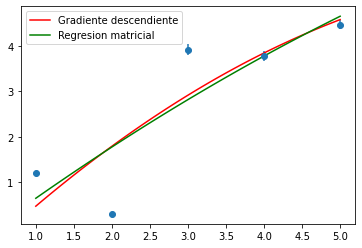

In [8]:
# su codigo aqui
def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

sigma = np.random.uniform(0,0.2,N)
_x = np.linspace(np.min(x),np.max(x),50)

#Gradiente descendiente
yg = GetModel(_x,xi)
#Regresion matricial
ym = GetModel(_x,param)

plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(_x,yg,color='r',label = "Gradiente descendiente")
plt.plot(_x,ym,color='g',label = "Regresion matricial")
plt.legend()
plt.show()